In [113]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [114]:
g = 9.81
r = 1
numberoPendulums = 6
theta = np.linspace(0.01,3.01,6)
omega = np.zeros(theta.size)

y0s = [None for i in range(numberoPendulums)]
for i in range(numberoPendulums):
    y0s[i] = [theta[i],omega[i]]

speed = 0.01
duration = 30
total_frames = int(duration/speed)
t = np.linspace(0,duration,total_frames)
def dydt(y,t):
    return [y[1], -g/r*np.sin(y[0])]

In [115]:
sols = [None for i in range(numberoPendulums)]
for i in range(numberoPendulums):
    sols[i] = odeint(dydt, y0s[i], t)
# th, = plt.plot(sol[:,0])
# om, = plt.plot(sol[:,1])
# th.set_label(r'$\theta$')
# om.set_label(r'$\omega$')
# plt.legend()

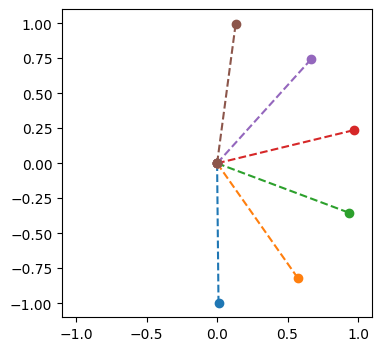

In [117]:
position = np.zeros((numberoPendulums,total_frames,2))
for i in range(numberoPendulums):
    the = sols[i][:,0]
    position[i,:,0] = np.sin(the) * r
    position[i,:,1] = -np.cos(the) * r
fig = plt.figure(figsize=(4,4))
plt.xlim((-1.1*r,1.1*r))
plt.ylim((-1.1*r,1.1*r))
points = [None for i in range(numberoPendulums)]
for i in range(numberoPendulums):
    points[i], = (plt.plot([0,position[i,0,0]],[0,position[i,0,1]],'--o',))
def anim(i):
    print('%d/%d'%(i+1,the.size),end='\r')
    for j in range(numberoPendulums):
        points[j].set_data([0,position[j,i,0]],[0,position[j,i,1]])
    return points

plt.show()
ani = animation.FuncAnimation(fig, anim, the.size)
ani.save('pen1.gif',writer='pillow',fps=24)